<a href="https://colab.research.google.com/github/Lirikman/neural_networks/blob/main/working%20with%20images%20OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Работа с изображениями с помощью библиотеки OpenCV

### Поиск лица на фотографии

Распознать лица на видео или фотографии очень просто, для этого мы воспользуемся каскадом Хаара.

Все, что нам нужно, уже есть в библиотеке OpenCV: и натренированные признаки, и набор функций, реализующих все алгоритмы.

Чтобы алгоритм лучше распознал лицо, и исключить различные непонятные области, вызовем метод detectMultiScale с дополнительными параметрами:
* scaleFactor - скачок масштабирования относительно текущего масштаба;
* minNeighbors - порог смежных прямоугольников для сохранения текущего прямоугольника;
* minSize - минимальный размер распознаваемой области.

Напишем код, и зададим параметры для detectMultiScale:

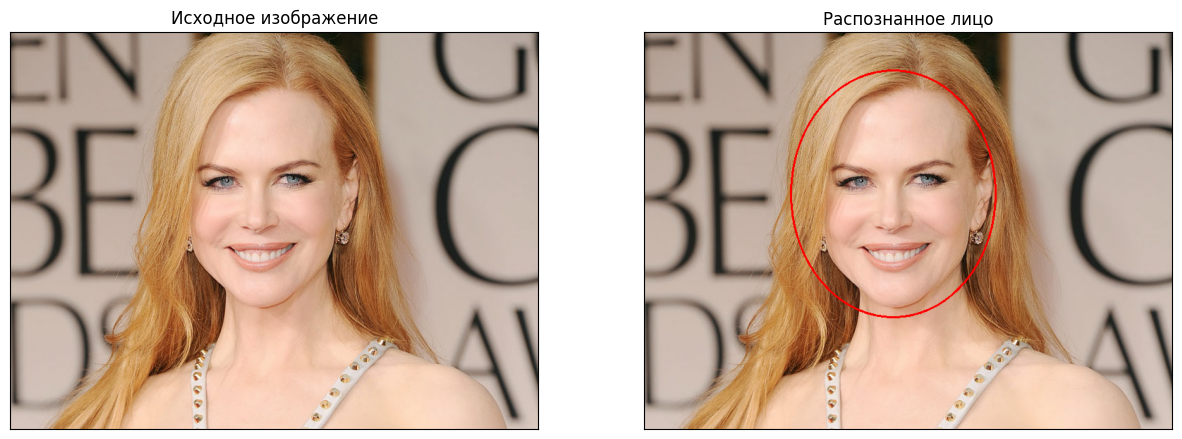

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

gdown.download('https://storage.yandexcloud.net/nikole-kidman/Nikole_Kidman.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./Nikole_Kidman.jpg')
img2 = img.copy()

# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=2.7, minNeighbors=1, minSize=(70, 70))

# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# формирование эллипса вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    # рисование эллипса
    cv2.ellipse(img2, (int(x + width*0.5), int(y + height*0.5)), (width, height-30), 90, 0, 360, (0, 0, 255), 2)


# визуализируем исходное изображение и изображение с найденной областью
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанное лицо')

pyplot.show()

### Поиск глаз на фотографии

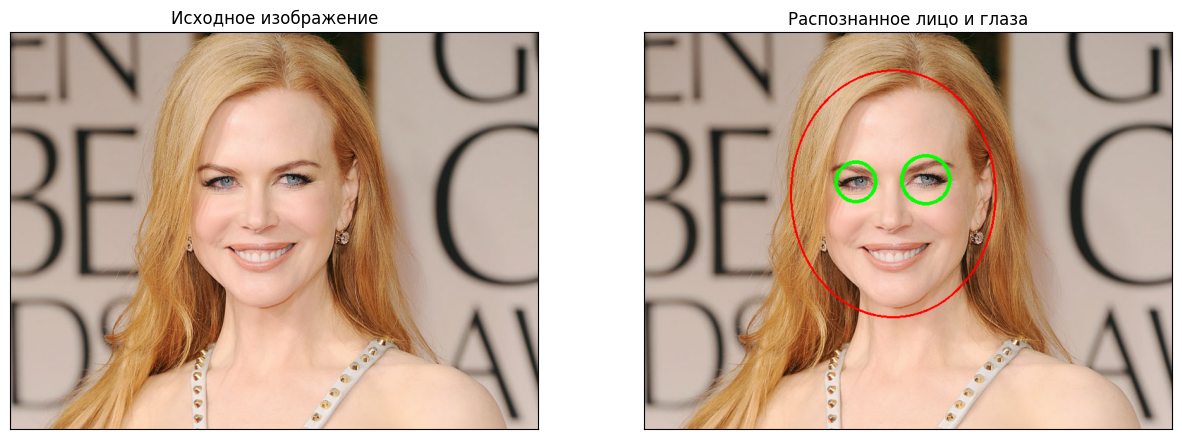

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

gdown.download('https://storage.yandexcloud.net/nikole-kidman/Nikole_Kidman.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./Nikole_Kidman.jpg')
img2 = img.copy()

# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=2.7, minNeighbors=1, minSize=(70, 70))

# формирование эллипса вокруг обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    # рисование эллипса
    cv2.ellipse(img2, (int(x + width*0.5), int(y + height*0.5)), (width, height-30), 90, 0, 360, (0, 0, 255), 2)

    face = img2[y:y + height, x:x + width] # найденная область с лицом

    # выполнение распознавания глаз
    eyes = classifier_eye.detectMultiScale(face)

    # формирование кругов вокруг обнаруженных глаз
    for (x_eye,y_eye,w_eye,h_eye) in eyes:

        # определяем центр круга
        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

        # вычисляем радиус окружности (подобран эмпирическим путем)
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 255, 0) # цвет в RGB (интенсивность цветов красный-зеленый-синий от 0 до 255)
        thickness = 3 # толщина линии
        # рисуем круг
        cv2.circle(face, center, radius, color, thickness)


# визуализируем исходное изображение и изображение с найденной областью
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанное лицо и глаза')

pyplot.show()

### Размытие лица на фотографии, исключая глаза

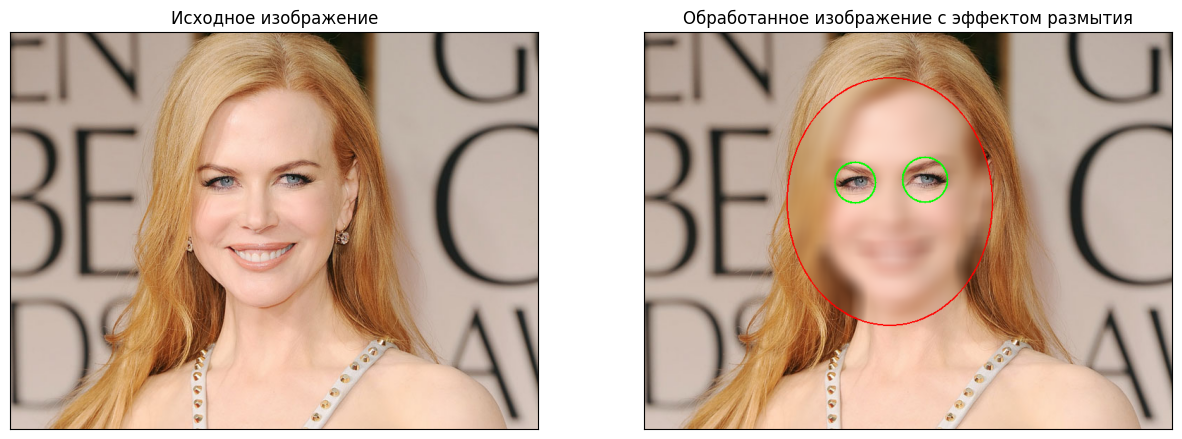

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
import numpy as np
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

gdown.download('https://storage.yandexcloud.net/nikole-kidman/Nikole_Kidman.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./Nikole_Kidman.jpg')

# создаем временное изображение и маску для работы с размытием лица
img2 = img.copy()
maskShape = (img.shape[0], img.shape[1], 1)
mask = np.full(maskShape, 0, dtype=np.uint8)

# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=3, minNeighbors=1, minSize=(70, 70))

# формирование эллипса вокруг обнаруженного лица и размытие лица
for box in bboxes:
  # формирование координат
  x, y, width, height = box
  # сначала размываем изображение полностью, чтобы взять из него только выделенную область - лицо
  img2 = cv2.blur(img2, (25, 25))
  # рисуем эллипс на изобоажении и на маске
  cv2.ellipse(img2, (int(x + width * 0.5), int(y + height * 0.5)), (width-70, height-40), 0, 0, 360, (0, 0, 255), 2)
  cv2.ellipse(mask, (int(x + width * 0.5), int(y + height * 0.5)), (width-70, height-40), 0, 0, 360, (255, 0, 0), -1)

  # применяем полученную маску
  mask_inv = cv2.bitwise_not(mask)
  img1_bg = cv2.bitwise_and(img, img, mask = mask_inv)
  img2_fg = cv2.bitwise_and(img2, img2, mask = mask)
  img2 = cv2.add(img1_bg, img2_fg)

  # создаем временные изображения и маску для работы с глазами
  img3 = img2.copy() # копируем изображение с размытым и выделенным лицом
  img4 = img.copy() # копируем исходное изображение для выделния глаз
  face = img4[y:y + height, x:x + width] # найденная область с лицом
  face_blur = img2[y:y + height, x:x + width] # найденная область с размытым лицом
  maskShapeFace = (face.shape[0], face.shape[1], 1)
  mask_face = np.full(maskShapeFace, 0, dtype=np.uint8)

  # выполнение распознавания глаз
  eyes = classifier_eye.detectMultiScale(face)

  # формирование кругов вокруг обнаруженных глаз и объединение изображений
  for (x_eye, y_eye, w_eye, h_eye) in eyes:
    # определяем центр круга
    center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

    # вычисляем радиус окружности (подобран эмпирическим путем)
    radius = int(0.3 * (w_eye + h_eye))
    color = (0, 255, 0) # цвет в RGB (интенсивность цветов красный-зеленый-синий от 0 до 255)
    thickness = 3 # толщина линии
    # рисуем круг на изображении и на маске
    cv2.circle(face, center, radius, color, thickness)
    cv2.circle(mask_face, center, radius, (255), -1)

    # Применяем полученную маску
    mask_face_inv = cv2.bitwise_not(mask_face)
    face_bg = cv2.bitwise_and(face_blur, face_blur, mask = mask_face_inv)
    img3_fg = cv2.bitwise_and(face, face, mask = mask_face)
    img3 = cv2.add(face_bg, img3_fg)

    # Объединяем глаза и размытое лицо
    img2[y:y + height, x:x + width] = img3


# визуализируем исходное изображение и изображение с найденной областью
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Обработанное изображение с эффектом размытия')

pyplot.show()

### Подрисуем солнечные очки

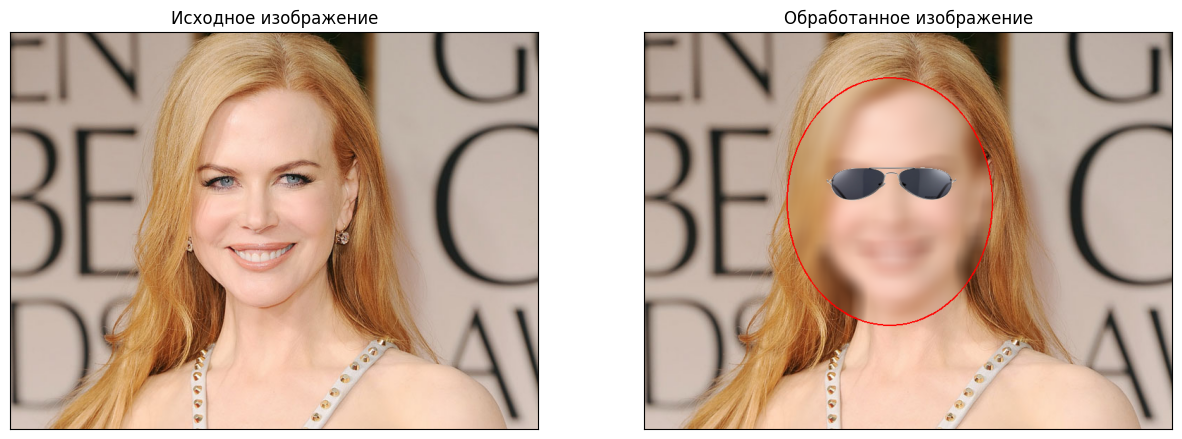

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
import numpy as np
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

gdown.download('https://storage.yandexcloud.net/nikole-kidman/Nikole_Kidman.jpg', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/nikole-kidman/sunglasses_1.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./Nikole_Kidman.jpg')

# Загрузим солнечные очки
sunglasses_mask = cv2.imread('./sunglasses_1.jpg')
h_mask, w_mask = sunglasses_mask.shape[:2]

# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# создаем временное изображение и маску для работы с размытием лица
img2 = img.copy()
maskShape = (img.shape[0], img.shape[1], 1)
mask = np.full(maskShape, 0, dtype=np.uint8)

# выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(img, scaleFactor=3, minNeighbors=1, minSize=(70, 70))

# формирование эллипса вокруг обнаруженного лица и размытие
for box in bboxes:
  # формирование координат
  x, y, width, height = box
  # сначала размываем изображение полностью, чтобы взять из него только выделенную область - лицо
  img2 = cv2.blur(img2, (25, 25))

  # рисуем овал на изобоажении и на маске
  cv2.ellipse(img2, (int(x + width * 0.5), int(y + height * 0.5)), (width-70, height-40), 0, 0, 360, (0, 0, 255), 2)
  cv2.ellipse(mask, (int(x + width * 0.5), int(y + height * 0.5)), (width-70, height-40), 0, 0, 360, (255, 0, 0), -1)

  # применяем полученную маску
  mask_inv = cv2.bitwise_not(mask)
  img1_bg = cv2.bitwise_and(img, img, mask = mask_inv)
  img2_fg = cv2.bitwise_and(img2, img2, mask = mask)
  img2 = cv2.add(img1_bg, img2_fg)

  # найденная область с лицом
  face = img2[y:y + height, x:x + width]

  # выполнение распознавания глаз
  eyes_rects = classifier_eye.detectMultiScale(face, scaleFactor=3, minNeighbors=1, minSize=(30, 30))

  # Берём первый найденный объект, это расположение левого глаза
  (ex, ey, ew, eh) = eyes_rects[0] # получаем координаты
  ex = int(ex-20) # сдвигаем очки по оси х на 20px
  ey = int(ey-11) # приподнимаем очки по оси y на 11px

  # область глаз
  eyes = face[ey:int(ey+eh*1.6), ex:int(ex+ew*3.2)]

  # Маштабируем очки до размера глаз
  sunglasses_mask_big = cv2.resize(sunglasses_mask, (int(ew*3.2), int(eh*1.6)), interpolation=cv2.INTER_AREA)

  # Сделаем наши усы черно-белые и применим инвариантный бинарный порог
  gray_mask = cv2.cvtColor(sunglasses_mask_big, cv2.COLOR_BGR2GRAY)
  ret, mask_sunglasses = cv2.threshold(gray_mask, 215, 255, cv2.THRESH_BINARY)

  # инвертируем маску
  mask_sunglasses_inv = cv2.bitwise_not(mask_sunglasses)

  # побитовое AND для двух изображений, результирующая - пиксели присутствующие на обоих изображениях
  masked_eyes = cv2.bitwise_and(sunglasses_mask_big, sunglasses_mask_big, mask=mask_sunglasses_inv)
  masked_face = cv2.bitwise_and(eyes, eyes, mask=mask_sunglasses)

  # Объединяем глаза и очки
  face[ey:int(ey+eh*1.6), ex:int(ex+ew*3.2)] = cv2.add(masked_eyes, masked_face)


# визуализируем исходное изображение и изображение с найденной областью
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Обработанное изображение')

pyplot.show()